PHASE 1: LOADING THE DATASET AND PREPROCESSING

In [119]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization


In [120]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

In [121]:
xtrain.shape #(50000, 32, 32, 3)
#normalization
xtrain=xtrain.astype("float32")/255.0
xtest=xtest.astype("float32")/255.0
# one hot encoding
ytrain=to_categorical(ytrain,10)
ytest=to_categorical(ytest,10)


print(f"Training data shape: {xtrain.shape}, Training labels shape: {ytrain.shape}")
print(f"Test data shape: {xtest.shape}, Test labels shape: {ytest.shape}")

Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 10)
Test data shape: (10000, 32, 32, 3), Test labels shape: (10000, 10)


PHASE 2: BUILDING CNN MODEL

In [122]:

cnn=Sequential([
    Conv2D(filters=64,kernel_size=3,activation="relu", input_shape=[32,32,3]),
    #BatchNormalization(),
    MaxPooling2D(pool_size=2,strides=2),
    Conv2D(filters=64,kernel_size=3,activation="relu", input_shape=[32,32,3]),
    #BatchNormalization(),
    MaxPooling2D(pool_size=2,strides=2),
    Conv2D(filters=64,kernel_size=3,activation="relu", input_shape=[32,32,3]),
    #BatchNormalization(),
    MaxPooling2D(pool_size=2,strides=2),
    Flatten(),
    Dense(128,activation='relu'),
    #BatchNormalization(),
    Dropout(0.25),
    Dense(10,activation='softmax')
])
cnn.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
cnn.summary()


c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)              │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,834 (429.04 KB)

 Trainable params: 109,834 (429.04 KB)

 Non-trainable params: 0 (0.00 B)

In [123]:
#ADDED STEP
datagen = ImageDataGenerator(
    rotation_range=20,  # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    horizontal_flip=True,  # Randomly flip images horizontally
    zoom_range=0.2,  # Randomly zoom in/out
    fill_mode='nearest'  # Fill in pixels after transformations
)

# Fit the generator to your training data
#datagen.fit(xtrain)

PHASE 3: TRAIN AND EVALUATE THE MODEL

In [124]:
history=cnn.fit(xtrain,ytrain,epochs=10,batch_size=32,validation_data=(xtest,ytest),verbose=1)
#history = cnn.fit(datagen.flow(xtrain, ytrain, batch_size=32),epochs=10,validation_data=(xtest, ytest),verbose=1)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.3168 - loss: 1.8289 - val_accuracy: 0.5399 - val_loss: 1.2713
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.5396 - loss: 1.2743 - val_accuracy: 0.5750 - val_loss: 1.2000
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6069 - loss: 1.1120 - val_accuracy: 0.6389 - val_loss: 1.0129
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.6396 - loss: 1.0118 - val_accuracy: 0.6452 - val_loss: 1.0135
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.6692 - loss: 0.9390 - val_accuracy: 0.6760 - val_loss: 0.9292
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6880 - loss: 0.8853 - val_accuracy: 0.6725 - val_loss: 0.9283
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7025 - loss: 0.8382 - val_accuracy: 0.6947 - val_loss: 0.8822
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7234 -

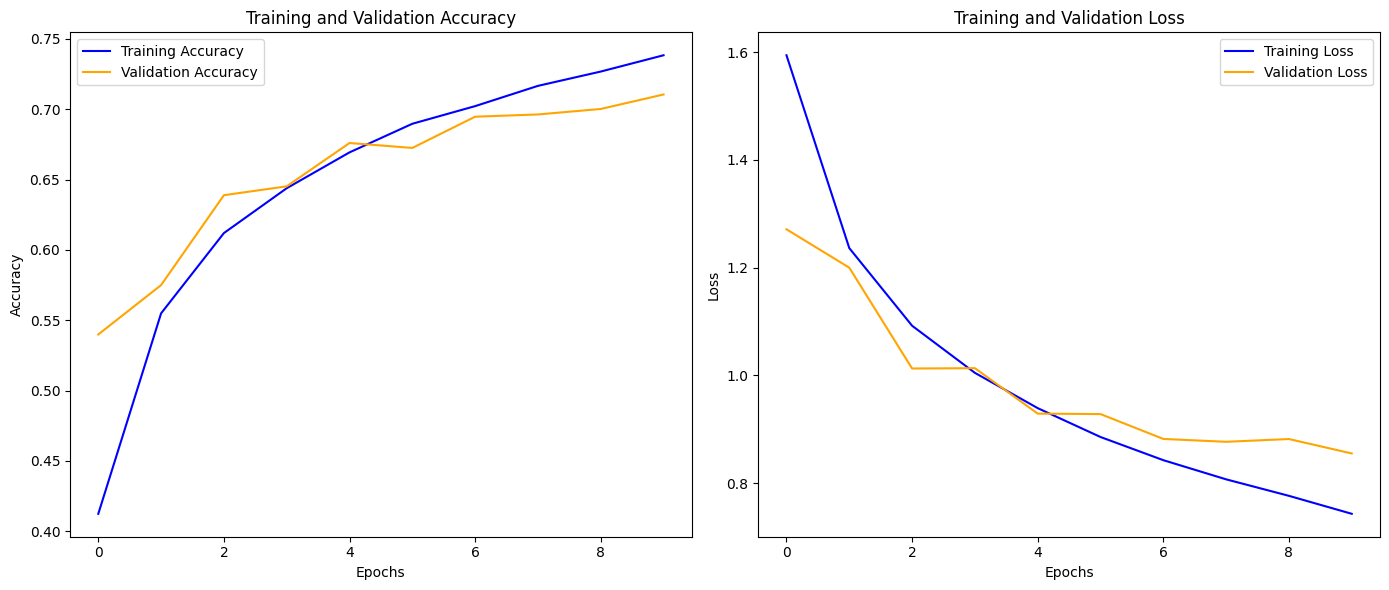

In [125]:
import matplotlib.pyplot as plt

# Extract training and validation accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Extract training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create subplots for accuracy and loss curves
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Training and Validation Accuracy
axes[0].plot(train_accuracy, label='Training Accuracy', color='blue')
axes[0].plot(val_accuracy, label='Validation Accuracy', color='orange')
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot Training and Validation Loss
axes[1].plot(train_loss, label='Training Loss', color='blue')
axes[1].plot(val_loss, label='Validation Loss', color='orange')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()


VIEW THE MARKDOWNS BELOW IN EDITING MODE FOR CLEARER READING

accuracy: 0.8242 - loss: 0.5096 - val_accuracy: 0.6925 - val_loss: 0.9623,
There's overfitting we should fix

DROP OUT
When applying:
 0.5 drop out accuracy: 0.6679 - loss: 0.9372 - val_accuracy: 0.6678 - val_loss: 0.9448
 0.25 drop out accuracy: 0.7387 - loss: 0.7377 - val_accuracy: 0.6931 - val_loss: 0.8953

USING 64 FILTERS WITH 2 CONV LAYERS :  accuracy: 0.7590 - loss: 0.6767 - val_accuracy: 0.6960 - val_loss: 0.9164
USING 32 FILTERS WITH 3 CONV LAYERS :  accuracy: 0.6799 - loss: 0.9162 - val_accuracy: 0.6685 - val_loss: 0.9448
USING 64 FILTERS WITH 3 CONV LAYERS :  accuracy: 0.7446 - loss: 0.7238 - val_accuracy: 0.7083 - val_loss: 0.8410


USING IMAGE GENERATOR AND DROP OUT:      accuracy: 0.5681 - loss: 1.2109 - val_accuracy: 0.6251 - val_loss: 1.0598
USING IMAGE GENERATOR WITHOUT DROP OUT:  accuracy: 0.6445 - loss: 1.0150 - val_accuracy: 0.6932 - val_loss: 0.8781

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


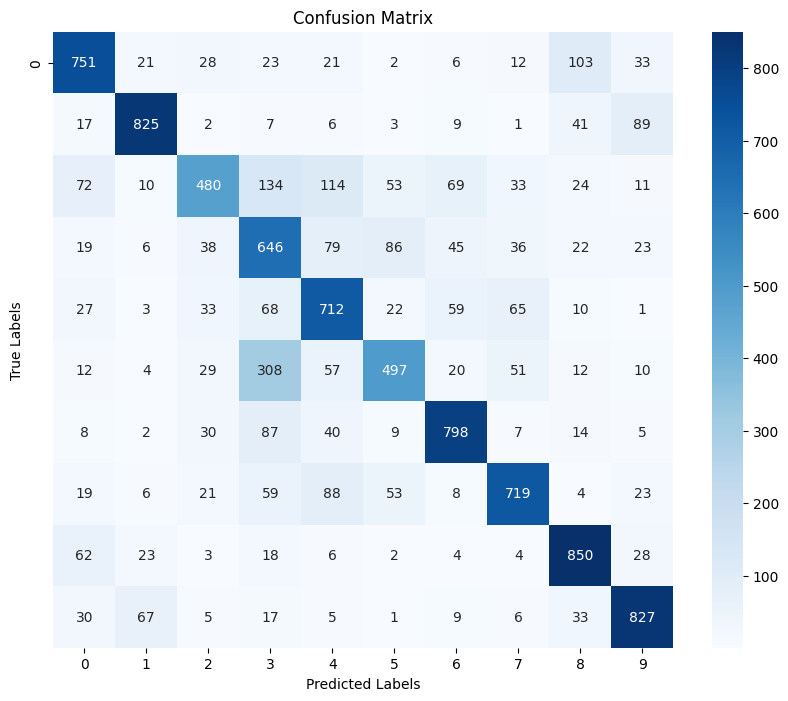

              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1000
           1       0.85      0.82      0.84      1000
           2       0.72      0.48      0.58      1000
           3       0.47      0.65      0.55      1000
           4       0.63      0.71      0.67      1000
           5       0.68      0.50      0.58      1000
           6       0.78      0.80      0.79      1000
           7       0.77      0.72      0.74      1000
           8       0.76      0.85      0.80      1000
           9       0.79      0.83      0.81      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



In [130]:
#CM
# Get predicted probabilities
ypred_prob = cnn.predict(xtest)

# Convert probabilities to class labels
ypred = np.argmax(ypred_prob, axis=1)

# Ensure y_test is in label format
if ytest.shape[1] == 10:  # Check if y_test is one-hot encoded
    y_true = np.argmax(ytest, axis=1)
else:
    y_true = ytest.flatten()  # In case y_test is already in label format

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, ypred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=range(10),yticklabels=(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report for precision, recall, f1-score
print(classification_report(y_true, ypred))